In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes out plots higher resolution, which makes them easier to see while building
plt.rcParams['figure.dpi'] = 100

In [214]:
gdp = pd.read_csv('data/gdp_world_bank.csv')
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


In [215]:
latamCountries = ['Argentina', 'Brazil', 'Chile', 'Colombia','Peru']
gdp = gdp.loc[gdp['Country Name'].isin(latamCountries)]

In [216]:
columnsKeep = ['Country Name','2017','2018','2019','2020']
gdp = gdp[columnsKeep]

In [217]:
gdp

,Country Name,2017,2018,2019,2020
9,Argentina,6.436290e+11,5.248200e+11,4.519320e+11,3.892880e+11
29,Brazil,2.063510e+12,1.916930e+12,1.877820e+12,1.444730e+12
39,Chile,2.770350e+11,2.975720e+11,2.793850e+11,2.529400e+11
45,Colombia,3.118840e+11,3.341980e+11,3.234300e+11,2.714380e+11
186,Peru,2.110070e+11,2.225750e+11,2.284710e+11,2.020140e+11


In [220]:
years = []
for year in range(2010,2021):
    for i in range(5):
        years.append(year)

In [221]:
d = {'Country Name': latamCountries*4, 'Year': years, 'GDP': int}
df = pd.DataFrame(data=d)

for country, gdp2017 in zip(gdp['Country Name'], gdp['2017']):
    df.loc[(df['Country Name']== country) & (df['Year'] == 2017), 'GDP'] = gdp2017
    
for country, gdp2018 in zip(gdp['Country Name'], gdp['2018']):
    df.loc[(df['Country Name']== country) & (df['Year'] == 2018), 'GDP'] = gdp2018
    
for country, gdp2019 in zip(gdp['Country Name'], gdp['2019']):
    df.loc[(df['Country Name']== country) & (df['Year'] == 2019), 'GDP'] = gdp2019

for country, gdp2020 in zip(gdp['Country Name'], gdp['2020']):
    df.loc[(df['Country Name']== country) & (df['Year'] == 2020), 'GDP'] = gdp2020

In [222]:
gdp = df

In [223]:
gdp['gdp_10billions'] = gdp['GDP'] / 10_000_000_000

In [225]:
gdp = gdp.drop('GDP', 1)

/var/folders/jq/96z3l_5s3pggbfxqc6dnldbm0000gn/T/ipykernel_72620/530490999.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  gdp = gdp.drop('GDP', 1)


In [226]:
gdp

,Country Name,Year,gdp_10billions
0,Argentina,2017,64.3629
1,Brazil,2017,206.351
2,Chile,2017,27.7035
3,Colombia,2017,31.1884
4,Peru,2017,21.1007
5,Argentina,2018,52.482
6,Brazil,2018,191.693
7,Chile,2018,29.7572
8,Colombia,2018,33.4198
9,Peru,2018,22.2575


/var/folders/jq/96z3l_5s3pggbfxqc6dnldbm0000gn/T/ipykernel_72620/936343397.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(gdp_dumbbell.index,       # Set labels again


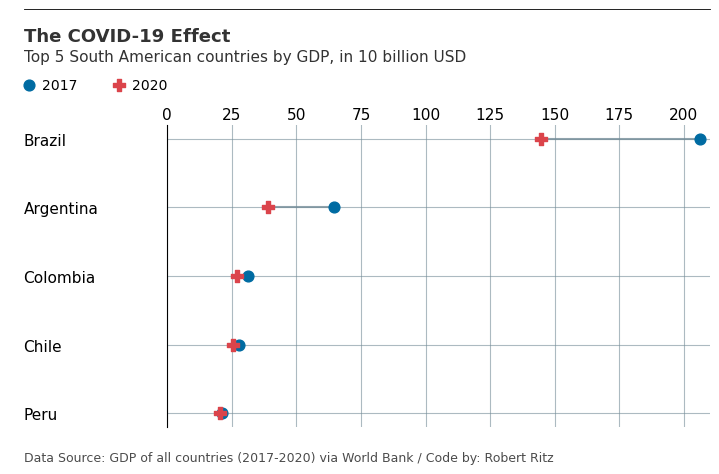

In [276]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(7,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Setup data
gdp_dumbbell = (gdp.pivot(index='Country Name',columns='Year', values='gdp_10billions').sort_values(by=2020))

# Plot data
# Plot horizontal lines first
ax.hlines(y=gdp_dumbbell.index, xmin=gdp_dumbbell[2017], xmax=gdp_dumbbell[2020], color='#758D99', zorder=2, linewidth=1.5, label='_nolegend_', alpha=.8)
# Plot bubbles next
ax.scatter(gdp_dumbbell[2017], gdp_dumbbell.index, label='2017', s=60, color='#006BA2', zorder=3)
ax.scatter(gdp_dumbbell[2020], gdp_dumbbell.index, label='2020', s=80, color='#DB444B', zorder=3, marker ='P')

# Set xlim
ax.set_xlim(0, 210)

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_dumbbell.index,       # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Set Legend
ax.legend(['2017', '2020'], loc=(-.29,1.09), ncol=2, frameon=False, handletextpad=-.1, handleheight=1)

# Add in line and tag
ax.plot([-0.08, .9],                 # Set width of line
        [1.17, 1.17],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='Black', 
        linewidth=.6)

# Add in title and subtitle
ax.text(x=-0.08, y=1.09, s="The COVID-19 Effect", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-0.08, y=1.04, s="Top 5 South American countries by GDP, in 10 billion USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-0.08, y=0.04, s="""Data Source: GDP of all countries (2017-2020) via World Bank / Code by: Robert Ritz""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images/latamGdpCovid.png',    # Set path and filename
            dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')                  # Set background color to white